In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
import json

In [12]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter

# print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/reza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:

stopwords_deep_learning = ['learning', 'network', 'neural', 'networks', 'deep', 'via', 'using', 'convolutional',
                           'single', 'data', 'method', 'based', 'beyond', 'model', 'algorithm', 'models', 'methods', 'evaluation', 'task', 'tasks', 'fast']

with open('data/neurips2020.json') as fp:
    data_set = json.load(fp)
    
keyword_list = []
for i, title in enumerate(data_set):
    word_list = title.split(" ")
    word_list = list(set(word_list))

    word_list_cleaned = [] 
    for word in word_list: 
        if not word.strip():
            continue
        word = word.lower()
        if word not in stopwords.words('english') and word not in stopwords_deep_learning: #remove stopwords
            word_list_cleaned.append(word)

    for k in range(len(word_list_cleaned)):
        keyword_list.append(word_list_cleaned[k])
        
keyword_counter = Counter(keyword_list)

print('{} different keywords before merging'.format(len(keyword_counter)))

# Merge duplicates: CNNs and CNN
duplicates = []
for k in keyword_counter:
    if k+'s' in keyword_counter:
        duplicates.append(k)
for k in duplicates:
    keyword_counter[k] += keyword_counter[k+'s']
    del keyword_counter[k+'s']
print('{} different keywords after merging'.format(len(keyword_counter)))
# print(keyword_counter)  

# print("")

3538 different keywords before merging
3308 different keywords after merging


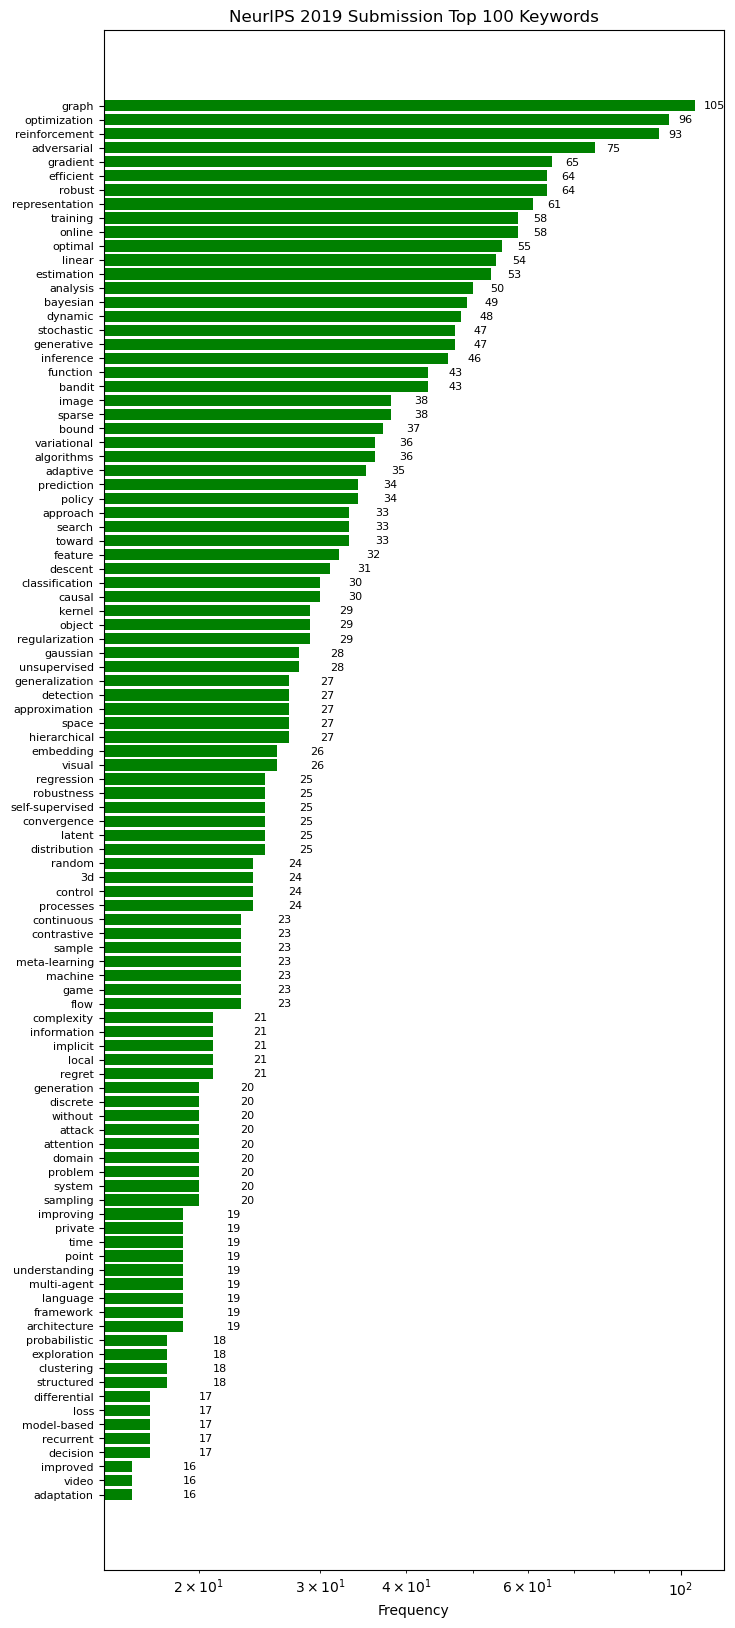

In [16]:
# Show N most common keywords and their frequencies
num_keyowrd = 100
keywords_counter_vis = keyword_counter.most_common(num_keyowrd)

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 20))

key = [k[0] for k in keywords_counter_vis] 
value = [k[1] for k in keywords_counter_vis] 
y_pos = np.arange(len(key))
ax.barh(y_pos, value, align='center', color='green', ecolor='black', log=True)
ax.set_yticks(y_pos)
ax.set_yticklabels(key, rotation=0, fontsize=8)
ax.invert_yaxis() 
for i, v in enumerate(value):
    ax.text(v + 3, i + .25, str(v), color='black', fontsize=8)
# ax.text(y_pos, value, str(value))
ax.set_xlabel('Frequency')
ax.set_title('NeurIPS 2019 Submission Top {} Keywords'.format(num_keyowrd))

plt.show()

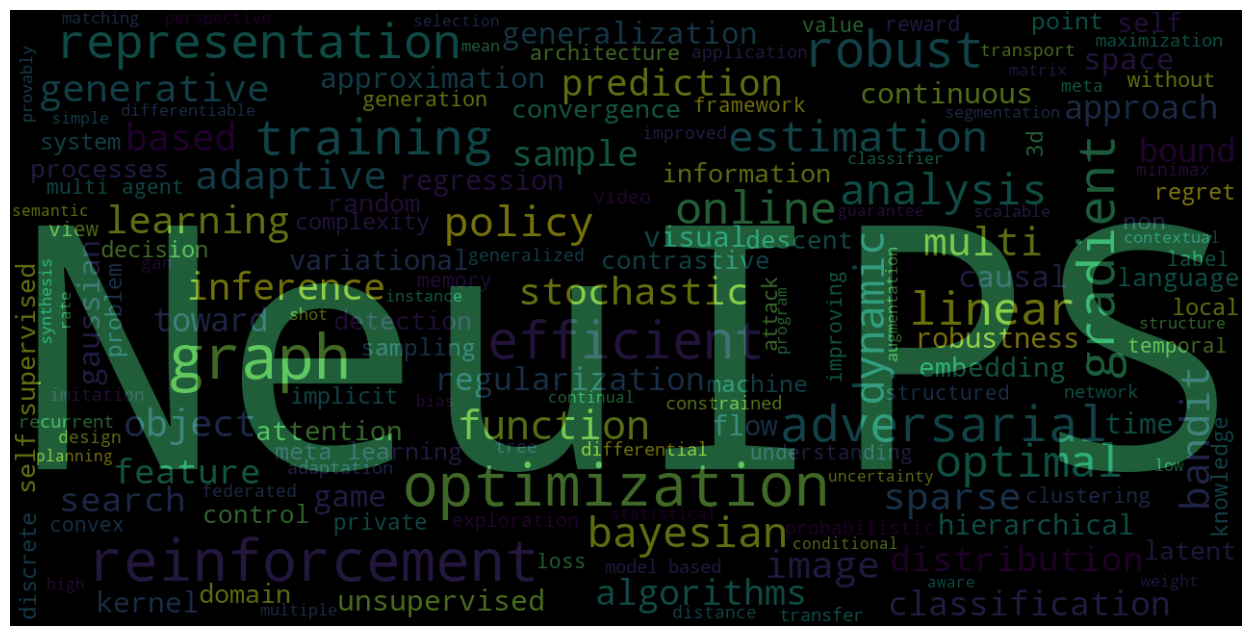

In [15]:
# Show the word cloud forming by keywords
from wordcloud import WordCloud
NIPS = WordCloud(max_font_size=800, max_words=160, 
                      width=1280, height=640,
                      background_color="black").generate(' '.join(['NeuIPS'] * 500))

wordcloud = WordCloud(max_font_size=64, max_words=160, 
                      width=1280, height=640,
                      background_color="black").generate(' '.join(keyword_list))
plt.figure(figsize=(16, 8))
plt.imshow(NIPS, interpolation="bilinear", alpha=1)
plt.imshow(wordcloud, interpolation="bilinear", alpha=.5)
plt.axis("off")
plt.show()